In [1]:
from IPython.display import Math
import numpy as np
import pandas as pd
from IPython.display import HTML
from collections import Counter
from sage.modules.free_module_integer import IntegerLattice

H = IntegralLattice("H")
E8 = IntegralLattice("E8").twist(-1)
E82 = E8.twist(2)
H2 = H.twist(2)

# Ambient Lattices and Coxeter Diagrams

In [2]:
def Coxeter_Diagram(M):
    nverts = M.ncols()
    G = Graph()
    vertex_labels = dict();
    
    vertex_colors = {
        '#F8F9FE': [], # white
        '#BFC9CA': [], # black
    }
    
    for i in range(nverts):
        for j in range(nverts):
            mij = M[i, j]
            if i == j: 
                if mij == -2:
                    vertex_colors["#F8F9FE"].append(i) # white
                    continue
                if mij == -4:
                    vertex_colors["#BFC9CA"].append(i) # black
                    continue
                continue
            if mij > 0:
                G.add_edge(i, j, str(mij) )
                continue
    assert len( vertex_colors["#F8F9FE"]) + len( vertex_colors["#BFC9CA"]) == nverts
    G.vertex_colors = vertex_colors    
    return G

def plot_coxeter_diagram(G, v_labels, pos={}):
    n = len( G.vertices() )
    vlabs = {v: k for v, k in enumerate(v_labels)}
    if pos == {}:
        display(G.plot(
            edge_labels=True, 
            vertex_labels = vlabs,
            vertex_size=200,
            vertex_colors = G.vertex_colors
        ))
    else:
        display(G.plot(
            edge_labels=True, 
            vertex_labels = vlabs,
            vertex_size=200,
            vertex_colors = G.vertex_colors,
            pos = pos
        ))
        
def root_intersection_matrix(vectors, labels, bil_form):
    n = len(vectors)
    M = zero_matrix(ZZ, n)
    nums = Set(range(n))
    for i in range(n):
        for j in range(n):
            M[i, j] = bil_form( vectors[i], vectors[j] )
            
    # Must be symmetric
    assert M.is_symmetric()
        
    # Must have -2 or -4 on the diagonal
    s = Set( M.diagonal() )
    assert s in Subsets( Set( [-2, -4] ) )

    # Diagonals should be square norms of vectors
    for i in range(n):
        assert M[i, i] == bil_form(vectors[i], vectors[i])
    return M

def is_elliptic_matrix(M):
    return (-1 * M).is_positive_definite()

def is_parabolic_matrix(M):
    return (-1 * M).is_positive_semidefinite()

def roots_from_subgraph(H):
    return [V[index] for index in H.vertices()]

In [3]:
positions = {
    "Sterk_1": {
        0: [0, 0],
        1: [4, 0],
        2: [8, 0],
        3: [8, -4],
        4: [8, -8],
        5: [4, -8],
        6: [0, -8],
        7: [0, -4],
        8: [2, -6],
        9: [3.25, -4.75],
        10: [4.5, -3.5],
        11: [6, -2]
    },
    "Sterk_2": {
        0: [0, 0],
        1: [-4, 0],
        2: [-8, 0],
        3: [-7, 4],
        4: [-6, 8],
        5: [-5, 12],
        6: [-4, 16],
        7: [-3, 20],
        8: [-2, 24],
        9: [-2, 6]
    },
    "Sterk_3": {
        0: [0, -4],
        1: [0, 4],
        2: [0, 8],
        3: [0, 12],
        4: [0, 16],
        5: [4, 16],
        6: [8, 16],
        7: [12, 16],
        8: [20, 16],
        9: [4, 12],
        10: [6, 2],
        11: [14, 10]
    },
    "Sterk_4": {
        0: [0, 0],
        1: [0, 4],
        2: [0, 8],
        3: [4, 8],
        4: [8, 8],
        5: [12, 8],
        6: [16, 8],
        7: [16, 4],
        8: [16, 0],
        9: [4, 4],
        10: [12, 4]    
    },
    "Sterk_5": {
        0: [0, 0],
        1: [10, 0],
        2: [20, 0],
        3: [20, -10],
        4: [20, -20],
        5: [10, -20],
        6: [0, -20],
        7: [0, -10],
        8: [4, -4],
        9: [16, -4],
        10: [16, -16],
        11: [4, -16],
        12: [8, -8],
        13: [8, -12]
    }
}

Sterk_roots = {
    "Sterk_1": [],
    "Sterk_2": [],
    "Sterk_3": [],
    "Sterk_4": [],
    "Sterk_5": []
}

In [4]:
# Root vectors for (18, 2, 0), roots taken from above, v_i are according to numerical labeling above

v1 = a8t
v2 = ep + fp + w1 + w8t
v3 = a1 
v4 = a3
v5 = a4
v6 = a5
v7 = a6
v8 = a7
v9 = a8
v10 = ep + fp + w8 + w1t
v11 = a1t
v12 = a3t
v13 = a4t
v14 = a5t
v15 = a6t
v16 = a7t

v17 = ep + w8t
v18 = a2
v19 = ep + w8
v20 = a2t

v21 = fp - ep
v22 = 5 *ep + 3 *fp + 2 *w2 + 2 *w2t

roots_18_2_0 = [v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22]
labels = [f"$v_{ {r + 1} }$" for r in range( len( roots_18_2_0 ) )]
intersection_matrix_roots_18_2_0 = root_intersection_matrix(roots_18_2_0, labels = labels, bil_form=dot)

G_18_2_0 = Coxeter_Diagram(intersection_matrix_roots_18_2_0)
plot_coxeter_diagram(
    G_18_2_0, 
    v_labels = labels,
    pos = {
         0: [0, 0],
        1: [4, 0],
        2: [8, 0],
        3: [12, 0],
        4: [16, 0],
        5: [16, -4],
        6: [16, -8],
        7: [16, -12],
        8: [16, -16],
        9: [12, -16],
        10: [8, -16],
        11: [4, -16],
        12: [0, -16],
        13: [0, -12],
        14: [0, -8],
        15: [0, -4],
        16: [4, -4],
        17: [12, -4],
        18: [12, -12],
        19: [4, -12],
        20: [8, -10],
        21: [8, -6],
    }
)

TypeError: unsupported operand parent(s) for +: 'Lattice of degree 12 and rank 12 over Integer Ring
Decomposition: U ⊕ U(2) ⊕ E8(-1)(2)
Named basis: ['e', 'f', 'ep', 'fp', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8']
Gram matrix:
[ 0  1| 0  0| 0  0  0  0  0  0  0  0]
[ 1  0| 0  0| 0  0  0  0  0  0  0  0]
[-----+-----+-----------------------]
[ 0  0| 0  2| 0  0  0  0  0  0  0  0]
[ 0  0| 2  0| 0  0  0  0  0  0  0  0]
[-----+-----+-----------------------]
[ 0  0| 0  0|-4  0  2  0  0  0  0  0]
[ 0  0| 0  0| 0 -4  0  2  0  0  0  0]
[ 0  0| 0  0| 2  0 -4  2  0  0  0  0]
[ 0  0| 0  0| 0  2  2 -4  2  0  0  0]
[ 0  0| 0  0| 0  0  0  2 -4  2  0  0]
[ 0  0| 0  0| 0  0  0  0  2 -4  2  0]
[ 0  0| 0  0| 0  0  0  0  0  2 -4  2]
[ 0  0| 0  0| 0  0  0  0  0  0  2 -4]
Signature: (2, 10), Index: -8, Discriminant: 2^10, 
Even, Non-unimodular, p-elementary, Length: 10, 
A_L: Multiplicative Abelian group isomorphic to C2^10, 
' and 'Lattice of degree 20 and rank 20 over Integer Ring
Decomposition: U ⊕ U(2) ⊕ E8(-1)^2
Gram matrix:
[ 0  1| 0  0| 0  0  0  0  0  0  0  0| 0  0  0  0  0  0  0  0]
[ 1  0| 0  0| 0  0  0  0  0  0  0  0| 0  0  0  0  0  0  0  0]
[-----+-----+-----------------------+-----------------------]
[ 0  0| 0  2| 0  0  0  0  0  0  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 2  0| 0  0  0  0  0  0  0  0| 0  0  0  0  0  0  0  0]
[-----+-----+-----------------------+-----------------------]
[ 0  0| 0  0|-2  0  1  0  0  0  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0| 0 -2  0  1  0  0  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0| 1  0 -2  1  0  0  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0| 0  1  1 -2  1  0  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0| 0  0  0  1 -2  1  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0| 0  0  0  0  1 -2  1  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0| 0  0  0  0  0  1 -2  1| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0| 0  0  0  0  0  0  1 -2| 0  0  0  0  0  0  0  0]
[-----+-----+-----------------------+-----------------------]
[ 0  0| 0  0| 0  0  0  0  0  0  0  0|-2  0  1  0  0  0  0  0]
[ 0  0| 0  0| 0  0  0  0  0  0  0  0| 0 -2  0  1  0  0  0  0]
[ 0  0| 0  0| 0  0  0  0  0  0  0  0| 1  0 -2  1  0  0  0  0]
[ 0  0| 0  0| 0  0  0  0  0  0  0  0| 0  1  1 -2  1  0  0  0]
[ 0  0| 0  0| 0  0  0  0  0  0  0  0| 0  0  0  1 -2  1  0  0]
[ 0  0| 0  0| 0  0  0  0  0  0  0  0| 0  0  0  0  1 -2  1  0]
[ 0  0| 0  0| 0  0  0  0  0  0  0  0| 0  0  0  0  0  1 -2  1]
[ 0  0| 0  0| 0  0  0  0  0  0  0  0| 0  0  0  0  0  0  1 -2]
Signature: (2, 18), Index: -16, Discriminant: 2^2, 
Even, Non-unimodular, p-elementary, Length: 2, 
A_L: Multiplicative Abelian group isomorphic to C2^2, 
'

In [ ]:
# Root vectors for (18, 0, 0), roots taken from above, w_i are according to numerical labeling above

w1 = a1
w2 = a3
w3 = a4
w4 = a5
w5 = a6
w6 = a7
w7 = a8
w8 = w8 + e
w9 = f- e
w10 = w8t + e
w11 = a8t
w12 = a7t
w13 = a6t
w14 = a5t
w15 = a4t
w16 = a3t
w17 = a1t
w18 = a2
w19 = a2t

roots_18_0_0 = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19]
intersection_matrix_roots_18_0_0 = root_intersection_matrix(
    roots_18_0_0, 
    labels = [f"$w_{ {r + 1} }$" for r in range( len(roots_18_0_0) )], 
    bil_form=dot
)

G_18_0_0 = Coxeter_Diagram(intersection_matrix_roots_18_0_0)
plot_coxeter_diagram(
    G_18_0_0, 
    v_labels = [f"$w_{ {i + 1} }$" for i in range( 19 )],
    pos = {
        0: [-4, 0],
        1: [-8, 0],
        2: [-12, 0],
        3: [-10, 4],
        4: [-8, 8],
        5: [-6, 12],
        6: [-4, 16],
        7: [-2, 20],
        8: [0, 24],
        9: [2, 20],
        10: [4, 16],
        11: [6, 12],
        12: [8, 8],
        13: [10, 4],
        14: [12, 0],
        15: [8, 0],
        16: [4, 0],
        17: [-4, 4],
        18: [4, 4]
    }
)

# Functions

In [5]:
def matrix_to_quiver(M):
    nverts = M.ncols()
    G = Graph(loops=True)
    for i in range(nverts):
        for j in range(nverts):
            mij = M[i, j]
            if mij == 0:
                continue
            G.add_edge(i, j, str(mij) )
    return G

def graph_to_matrix(G):
    verts = G.vertices()
    n = len(verts)
    M = zero_matrix(ZZ, n)
    for e in G.edges():
        M[ e[0], e[1] ] = e[2]
        M[ e[1], e[0] ] = e[2]
    return M
    
# Type A

def graph_A_n(n):
    return matrix_to_quiver( matrix_A_n(n) )

def matrix_A_n(n):
    return IntegralLattice(f"A{n}").twist(-1).gram_matrix()
    
def graph_A_n_2(n):
    return matrix_to_quiver( matrix_A_n_2(n) )

def matrix_A_n_2(n):
    return IntegralLattice(f"A{n}").twist(-2).gram_matrix()

# Type B

def graph_B_n_2(n):
    m=n-1
    G = Graph(loops=True)
    for i in range(m):
        G.add_edge(i, i, -4)
        G.add_edge(i, i+1, 2)
    G.add_edge(m, m, -2)
    return G

def matrix_B_n_2(n):
    return graph_to_matrix( graph_B_n_2(n) )

# Type C

def graph_C_n_2(n):
    m=n-1
    Gp = Graph(loops=True)
    for i in range(m):
        Gp.add_edge(i, i, -2)
        Gp.add_edge(i, i+1, 2)
    Gp.add_edge(m, m, -4)
    return Gp

def matrix_C_n_2(n):
    return graph_to_matrix( graph_C_n_2(n) )

# Type D

def graph_D_n(n):
    return matrix_to_quiver(matrix_D_n(n))

def matrix_D_n(n):
    return IntegralLattice(f"D{n}").twist(-1).gram_matrix()
    
def graph_D_n_2(n):
    return matrix_to_quiver(matrix_D_n_2(n))
    
def matrix_D_n_2(n):
    return IntegralLattice(f"D{n}").twist(-2).gram_matrix()

# Type E6

def graph_E_6():
    return matrix_to_quiver(matrix_E_6())

def matrix_E_6():
    return IntegralLattice("E6").twist(-1).gram_matrix()
    
def graph_E_6_2():
    return matrix_to_quiver(matrix_E_6_2())

def matrix_E_6_2():
    return IntegralLattice("E6").twist(-2).gram_matrix()

# Type E7

def graph_E_7():
    return matrix_to_quiver(matrix_E_7())

def matrix_E_7():
    return IntegralLattice("E7").twist(-1).gram_matrix()
    
def graph_E_7_2():
    return matrix_to_quiver(matrix_E_7_2())

def matrix_E_7_2():
    return IntegralLattice("E7").twist(-2).gram_matrix()

# Type E8

def graph_E_8():
    return matrix_to_quiver(matrix_E_8())

def matrix_E_8():
    return IntegralLattice("E8").twist(-1).gram_matrix()
    
def graph_E_8_2():
    return matrix_to_quiver(matrix_E_8_2())

def matrix_E_8_2():
    return IntegralLattice("E8").twist(-2).gram_matrix()

def graph_G_2():
    G = Graph(loops=True)
    G.add_edge(0, 1, 2)
    G.add_edge(0, 0, -2)
    G.add_edge(1, 1, -4)
    return G
    
def matrix_G_2():
    return graph_to_matrix(graph_G_2())

def get_all_rank_n_types(n):
    if n == 0:
        return [ 
            ("A_{0}" , matrix(ZZ, 0) ) 
       ]
    if n == 1:
        return [ 
            (f"A_{n}" ,matrix_A_n(1) ),
            (f"A_{n}(2)" ,matrix_A_n_2(1)) 
        ]
    if n == 2:
        return [ 
            (f"A_{n}",    matrix_A_n(2)),
            (f"A_{n}(2)", matrix_A_n_2(2)), 
            (f"G_{2}",    matrix_G_2()) 
        ]
    if n == 3:
        return [ 
            (f"A_{n}",    matrix_A_n(3)),
            (f"A_{n}(2)", matrix_A_n_2(3)), 
            (f"B_{n}(2)", matrix_B_n_2(3)),
            (f"C_{n}(2)", matrix_C_n_2(3))
        ]
    else:
        Ms = [ 
            (f"A_{n}",    matrix_A_n(n)),
            (f"A_{n}(2)", matrix_A_n_2(n)), 
            (f"B_{n}(2)", matrix_B_n_2(n)),
            (f"C_{n}(2)", matrix_C_n_2(n)),
            (f"D_{n}",    matrix_D_n(n)),
            (f"D_{n}(2)", matrix_D_n_2(n)) 
        ]
        if n == 6:
            Ms.extend([
                (f"E_6",    matrix_E_6() ),
                (f"E_6(2)", matrix_E_6_2() )
            ])
        elif n == 7:
            Ms.extend([
                (f"E_7",    matrix_E_7() ),
                (f"E_7(2)", matrix_E_7_2() )
            ])
        elif n == 8:
            Ms.extend([
                (f"E_8", matrix_E_8() ),
                (f"E_8(2)", matrix_E_8_2() )
            ])
        return Ms

type_A_graphs = [ graph_A_n_2(n) for n in range(11) ]
type_B_graphs = [ graph_B_n_2(n) for n in range(11) if n > 2]
type_C_graphs = [ graph_C_n_2(n) for n in range(11) if n > 2]
type_D_graphs = [ graph_D_n_2(n) for n in range(11) if n > 3]
type_E_graphs = [ graph_E_6_2(), graph_E_7_2(), graph_E_8_2() ]

type_A_matrices = [ matrix_A_n_2(n) for n in range(11) ]
type_B_matrices = [ matrix_B_n_2(n) for n in range(11) if n > 2 ]
type_C_matrices = [ matrix_C_n_2(n) for n in range(11) if n > 2]
type_D_matrices = [ matrix_D_n_2(n) for n in range(11) if n > 3]
type_E_matrices = [ matrix_E_6_2(), matrix_E_7_2(), matrix_E_8_2() ]

get_all_rank_n_types(3)

[(
       [-2  1  0]
       [ 1 -2  1]
'A_3', [ 0  1 -2]
),
 (
          [-4  2  0]
          [ 2 -4  2]
'A_3(2)', [ 0  2 -4]
),
 (
          [-4  2  0]
          [ 2 -4  2]
'B_3(2)', [ 0  2 -2]
),
 (
          [-2  2  0]
          [ 2 -2  2]
'C_3(2)', [ 0  2 -4]
)]

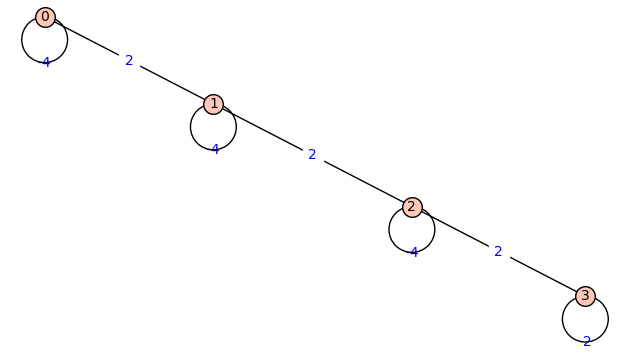

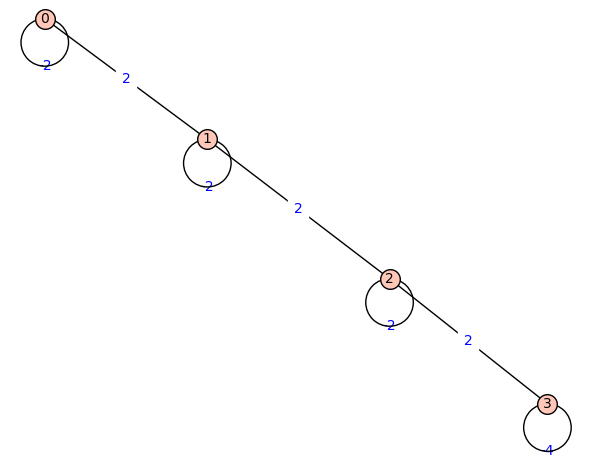

In [6]:
show( graph_B_n_2(4).plot(edge_labels=True) )
show( graph_C_n_2(4).plot(edge_labels=True) )

In [7]:
def sterk_subgraph_to_matrix(H, sterktype):
    roots = Sterk_roots[sterktype]
    H_roots = [ roots[index] for index in H.vertices() ]
    return root_intersection_matrix(
        H_roots, 
        labels = H.vertices(), 
        bil_form=dot
    )

def sterk_is_elliptic_subgraph(H, sterktype):
    return is_elliptic_matrix(
        sterk_subgraph_to_matrix(H, sterktype)
    )

In [8]:
def is_elliptic_subgraph(H):
    return is_elliptic_matrix( graph_to_matrix(H) )

def is_parabolic_subgraph(H, G):
    pass

def is_maximal_elliptic_subgraph(H, G):
    pass

def is_maximal_parabolic_subgraph(H, G):
    pass

def plot_sterk_subgraph(H, sterktype):
    assert sterktype in ["Sterk_1", "Sterk_2", "Sterk_3", "Sterk_3", "Sterk_4", "Sterk_5"]
    display(get_plot_sterk_subgraph(H, sterktype))

def get_plot_sterk_subgraph(H, sterktype):
    assert sterktype in ["Sterk_1", "Sterk_2", "Sterk_3", "Sterk_3", "Sterk_4", "Sterk_5"]
    G = Sterk_quivers[sterktype]
    red_edges = [ e for e in G.edges() if e in H.edges() ]
    red_vertices = [ e for e in G.vertices() if e in H.vertices() ]
    return G.plot(
        vertex_size=150,
        edge_colors={'red': red_edges},
        vertex_color='lightcyan',
        vertex_colors={'red': red_vertices},
        pos= positions[sterktype]
    )

def get_coxeter_label(H, sterktype):
    n = len( H.vertices() )
    ade_types = get_all_rank_n_types(n)
    M_H = sterk_subgraph_to_matrix(H, sterktype)
    this_type = [ x[0] for x in ade_types if x[1].is_similar(M_H) ]
    assert len(this_type) >= 1
    return this_type[0]

def summarize_elliptic_subgraphs(subgraphs, sterktype):
    show(f"Total number of elliptic subdiagrams: {len(subgraphs) }")
    show("---------------------------------")
    
    ranks = [len(H.vertices()) for H in subgraphs]
    d = Counter( ranks )
    n = len( Sterk_quivers[sterktype].vertices() )
    for i in reversed(range(n+1)):
        show(f"Number of rank {i} elliptic subdiagrams: {d[i]}")
        rank_i_types = [get_coxeter_label(H, sterktype) for H in subgraphs if len(H.vertices()) == i]
        di = Counter(rank_i_types)
        for k in di.keys():
            print("  ", k, ": ", di[k])
    
    show("---------------------------------")
    show("Counts of subdiagrams by type:")
    all_types = [get_coxeter_label(H, sterktype) for H in subgraphs]
    dp = Counter(all_types)
    for k in dp.keys():
        show(k, ": ", dp[k])

def display_elliptic_subgraphs(subgraphs, sterktype, save=False):
    n = len( Sterk_quivers[sterktype].vertices() )
    j = 0
    for i in reversed(range(n+1)):
        rank_i_subgraphs = [H for H in subgraphs if len(H.vertices() ) == i]
        show(f"Rank {i}: ")
        for H in rank_i_subgraphs:
            plot_sterk_subgraph( H, sterktype )
            this_type = get_coxeter_label(H, sterktype)
            show(this_type)
            if save:
                p = get_plot_sterk_subgraph(H, sterktype)
                p.save(f"/home/zack/{sterktype}/elliptic_subdiagram_number_{j}_rank_{i}_type_{this_type}_index_{j}.png")
            j = j+1
        show("--------------------------------------")




# Sterk 1

In [9]:
# Sterk 1

s1_1 = v3 + v11
s1_2 = v4 + v12
s1_3 = v5 + v13
s1_4 = v6 + v14
s1_5 = v7 + v15
s1_6 = v8 + v16
s1_7 = v9 + v1
s1_8 = v10 + v2
s1_9 = v17 + v19
s1_10 = v21
s1_11 = v22
s1_12 = v18 + v20

Sterk_roots["Sterk_1"] = [s1_1, s1_2, s1_3, s1_4, s1_5, s1_6, s1_7, s1_8, s1_9, s1_10, s1_11, s1_12]
Sterk1_labels = range( len(Sterk_roots["Sterk_1"]) )

Sterk1_gram_matrix = root_intersection_matrix(
    Sterk_roots["Sterk_1"], 
    labels = Sterk1_labels, 
    bil_form=dot
)

# positions = {
#     "Sterk_1": {
#         0: [0, 0],
#         1: [4, 0],
#         2: [8, 0],
#         3: [8, -4],
#         4: [8, -8],
#         5: [4, -8],
#         6: [0, -8],
#         7: [0, -4],
#         8: [0, -8],
#         9: [2, -6],
#         10: [4, -4],
#         11: [6, -2]
#     }


Sterk1_Coxeter_diagram = Coxeter_Diagram(Sterk1_gram_matrix)
plot_coxeter_diagram(
    Sterk1_Coxeter_diagram, 
    v_labels = Sterk1_labels,
    pos = positions["Sterk_1"]
)

NameError: name 'dot' is not defined

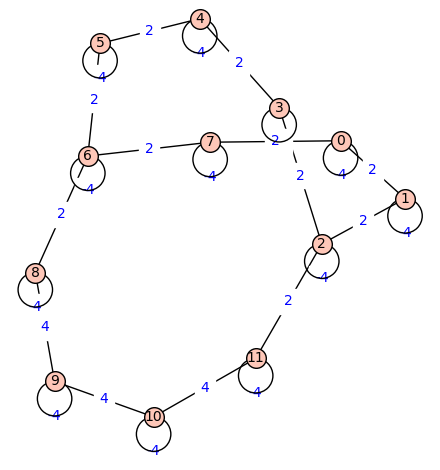

In [13]:
Sterk_quivers = {
    "Sterk_1": matrix_to_quiver(Sterk1_gram_matrix)
}

Sterk_quivers["Sterk_1"].plot(edge_labels=True)

In [ ]:
def get_connected_elliptic_subgraphs(G, sterktype):
    all_possible_subgraphs_by_index = subsets( set(list( G.vertices()) ) )
    all_possible_subgraphs = [G.subgraph(l) for l in all_possible_subgraphs_by_index]
    
    connected_elliptic_subgraphs_by_rank = list(reversed(sorted(
        [H for H in all_possible_subgraphs if H.is_connected() and sterk_is_elliptic_subgraph(H, sterktype) ],
        key=len
    )))

    return connected_elliptic_subgraphs_by_rank

Sterk1_connected_elliptic_subgraphs = get_connected_elliptic_subgraphs(
    Sterk_quivers["Sterk_1"], "Sterk_1"
)
show("Done")

In [ ]:
summarize_elliptic_subgraphs(Sterk1_connected_elliptic_subgraphs, "Sterk_1")

In [ ]:
# display_elliptic_subgraphs(Sterk1_connected_elliptic_subgraphs, "Sterk_1", save=True)

# Sterk 2

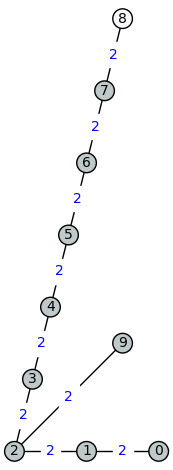

In [14]:
# Sterk 2

s2_1 = w1 + w17
s2_2 = w2 + w16
s2_3 = w3 + w15
s2_4 = w4 + w14
s2_5 = w5 + w13
s2_6 = w6 + w12
s2_7 = w7 + w11
s2_8 = w8 + w10
s2_9 = w9
s2_10 = w18 + w19

Sterk_roots["Sterk_2"] = [s2_1, s2_2, s2_3, s2_4, s2_5, s2_6, s2_7, s2_8, s2_9, s2_10]
Sterk2_labels = range( len(Sterk_roots["Sterk_2"]) )

Sterk2_gram_matrix = root_intersection_matrix(
    Sterk_roots["Sterk_2"], 
    labels = Sterk2_labels, 
    bil_form=dot 
)

Sterk2_Coxeter_diagram = Coxeter_Diagram(Sterk2_gram_matrix)


plot_coxeter_diagram(
    Sterk2_Coxeter_diagram, 
    v_labels = Sterk2_labels,
    pos = positions["Sterk_2"]
)

### Sterk_quivers = {
    "Sterk_1": matrix_to_quiver(Sterk1_gram_matrix),
    "Sterk_2": matrix_to_quiver(Sterk2_gram_matrix),
}

Sterk_quivers["Sterk_2"].plot(edge_labels=True)

In [ ]:
Sterk2_connected_elliptic_subgraphs = get_connected_elliptic_subgraphs(
    Sterk_quivers["Sterk_2"], "Sterk_2"
)
show("Done")

In [ ]:
summarize_elliptic_subgraphs(Sterk2_connected_elliptic_subgraphs, "Sterk_2")

In [ ]:
# display_elliptic_subgraphs(Sterk2_connected_elliptic_subgraphs, "Sterk_2", save=True)

# Sterk 3

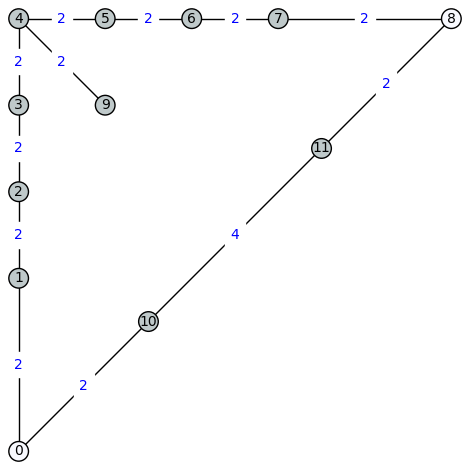

In [15]:
# Sterk 3

wa = lambda x: x + (1/2)*dot(v22, x) * v22
I = lambda x: x + wa(x)

s3_1 = v13
s3_2 = v14 + v12
s3_3 = v15 + v11
s3_4 = v16 + v10
s3_5 = v1 + v9
s3_6 = v2 + v8
s3_7 = v3 + v7
s3_8 = v4 + v6
s3_9 = v5
s3_10 = v17 + v19
s3_11 = I(v20) #v22 + 2*v20
s3_12 = I(v18) #v22 + 2*v18

Sterk_roots["Sterk_3"] = [s3_1, s3_2, s3_3, s3_4, s3_5, s3_6, s3_7, s3_8, s3_9, s3_10, s3_11, s3_12]
Sterk3_labels = range( len(Sterk_roots["Sterk_3"]) )
Sterk3_gram_matrix = root_intersection_matrix(
    Sterk_roots["Sterk_3"], 
    labels = Sterk3_labels, 
    bil_form=dot
)

Sterk3_Coxeter_diagram = Coxeter_Diagram(Sterk3_gram_matrix)
plot_coxeter_diagram(
    Sterk3_Coxeter_diagram, 
    v_labels = Sterk3_labels,
    pos = positions["Sterk_3"]
)

In [ ]:
Sterk_quivers = {
    "Sterk_1": matrix_to_quiver(Sterk1_gram_matrix),
    "Sterk_2": matrix_to_quiver(Sterk2_gram_matrix),
    "Sterk_3": matrix_to_quiver(Sterk3_gram_matrix),
}

Sterk_quivers["Sterk_3"].plot(edge_labels=True)

In [ ]:
Sterk3_connected_elliptic_subgraphs = get_connected_elliptic_subgraphs(
    Sterk_quivers["Sterk_3"], "Sterk_3"
)
show("Done")

In [ ]:
summarize_elliptic_subgraphs(Sterk3_connected_elliptic_subgraphs, "Sterk_3")

In [ ]:
display_elliptic_subgraphs(Sterk3_connected_elliptic_subgraphs, "Sterk_3", save=True)

# Sterk 4

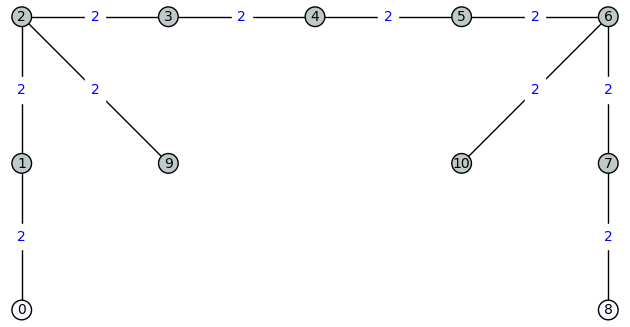

In [16]:
s4_1 = v15
s4_2 = v16 + v14
s4_3 = v1 + v13
s4_4 = v2 + v12
s4_5 = v3 + v11
s4_6 = v4 + v10
s4_7 = v5 + v9
s4_8 = v6 + v8
s4_9 = v7
s4_10 = v17 + v20
s4_11 = v18 + v19
s4_12 = v22 + v21

Sterk_roots["Sterk_4"] = [s4_1, s4_2, s4_3, s4_4, s4_5, s4_6, s4_7, s4_8, s4_9, s4_10, s4_11]

Sterk4_labels = range( len(Sterk_roots["Sterk_4"]) )


Sterk4_gram_matrix = root_intersection_matrix(
    Sterk_roots["Sterk_4"], 
    labels = Sterk2_labels, 
    bil_form=dot
)

Sterk4_Coxeter_diagram = Coxeter_Diagram(Sterk4_gram_matrix)

plot_coxeter_diagram(
    Sterk4_Coxeter_diagram, 
    v_labels = Sterk4_labels,
    pos = positions["Sterk_4"] 
)

In [ ]:
Sterk_quivers = {
    "Sterk_1": matrix_to_quiver(Sterk1_gram_matrix),
    "Sterk_2": matrix_to_quiver(Sterk2_gram_matrix),
    "Sterk_3": matrix_to_quiver(Sterk3_gram_matrix),
    "Sterk_4": matrix_to_quiver(Sterk4_gram_matrix),
}

Sterk_quivers["Sterk_4"].plot(edge_labels=True)

In [ ]:
Sterk4_connected_elliptic_subgraphs = get_connected_elliptic_subgraphs(
    Sterk_quivers["Sterk_4"], "Sterk_4"
)
show("Done")

In [ ]:
summarize_elliptic_subgraphs(Sterk4_connected_elliptic_subgraphs, "Sterk_4")

In [ ]:
display_elliptic_subgraphs(Sterk4_connected_elliptic_subgraphs, "Sterk_4", save=True)

# Sterk 5

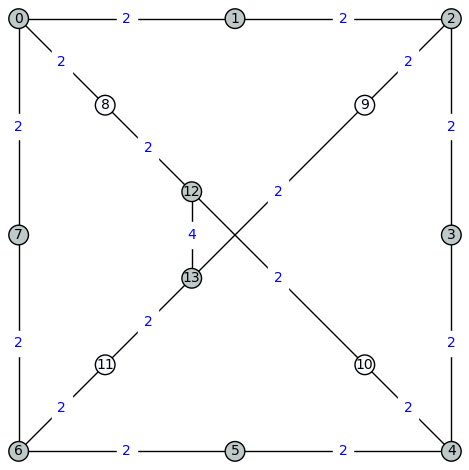

In [18]:
# Sterk 5

s5_1 = v16 + 2*v1 + v2
s5_2 = v2 + 2*v3 + v4
s5_3 = v4 + 2*v5 + v6
s5_4 = v6 + 2*v7 + v8
s5_5 = v8 + 2*v9 + v10
s5_6 = v10 + 2*v11 + v12
s5_7 = v12 + 2*v13 + v14
s5_8 = v14 + 2*v15 + v16
s5_9 = v17
s5_10 = v18
s5_11 = v19
s5_12 = v20
s5_13 = v21
s5_14 = v22

Sterk_roots["Sterk_5"] = [s5_1, s5_2, s5_3, s5_4, s5_5, s5_6, s5_7, s5_8, s5_9, s5_10, s5_11, s5_12, s5_13, s5_14]

Sterk5_labels = range( len(Sterk_roots["Sterk_5"]) )

Sterk5_gram_matrix = root_intersection_matrix(
    Sterk_roots["Sterk_5"], 
    labels = Sterk5_labels, 
    bil_form=dot
)

Sterk5_Coxeter_diagram = Coxeter_Diagram(Sterk5_gram_matrix)

plot_coxeter_diagram(
    Sterk5_Coxeter_diagram, 
    v_labels = Sterk5_labels,
    pos = positions["Sterk_5"]
)

In [ ]:
Sterk_quivers = {
    "Sterk_1": matrix_to_quiver(Sterk1_gram_matrix),
    "Sterk_2": matrix_to_quiver(Sterk2_gram_matrix),
    "Sterk_3": matrix_to_quiver(Sterk3_gram_matrix),
    "Sterk_4": matrix_to_quiver(Sterk4_gram_matrix),
    "Sterk_5": matrix_to_quiver(Sterk5_gram_matrix),
}

Sterk_quivers["Sterk_5"].plot(edge_labels=True)

In [ ]:
Sterk5_connected_elliptic_subgraphs = get_connected_elliptic_subgraphs(
    Sterk_quivers["Sterk_5"], "Sterk_5"
)
show("Done")

In [ ]:
summarize_elliptic_subgraphs(Sterk5_connected_elliptic_subgraphs, "Sterk_5")

In [ ]:
display_elliptic_subgraphs(Sterk5_connected_elliptic_subgraphs, "Sterk_5", save=True)

# Summary of Maximal Elliptic Diagrams

In [ ]:
def maximal_elliptics(all_elliptics):
    maximals = []
    for H in all_elliptics:
        is_subset_status = [ 
            set( H.vertices() ).issubset( set( Hp.vertices() ) ) 
            for Hp in  
            [ s for s in all_elliptics if s != H ]
        ]
        H_is_a_subset_of_something = reduce(lambda x, y: x or y, is_subset_status)
        if H_is_a_subset_of_something:
            continue
        else:
            maximals.append(H)
    return maximals

def summarize_maximal_elliptics(all_elliptics, sterktype):
    maximals = [ (H, get_coxeter_label(H, sterktype )) for H in maximal_elliptics(all_elliptics) ]
    show(f"Number of maximal elliptics: { len(maximals)}" )
    
    maximals = list( sorted( maximals, key = lambda x: x[1] ) )
    
    for H, label in maximals:
        plot_sterk_subgraph(H, sterktype)
        show(label)

In [ ]:
all_elliptics = {
    "Sterk_1": Sterk1_connected_elliptic_subgraphs,
    "Sterk_2": Sterk2_connected_elliptic_subgraphs,
    "Sterk_3": Sterk3_connected_elliptic_subgraphs,
    "Sterk_4": Sterk4_connected_elliptic_subgraphs,
    "Sterk_5": Sterk5_connected_elliptic_subgraphs,
}


lens = [ len(all_elliptics[k]) for k in all_elliptics] 
show(f"Number of (ALL) elliptics in Sterk 1 through 5: {lens}")
show(f"Total number of (ALL) elliptics in all Sterk diagrams: {sum(lens )}")

In [ ]:
all_maximal_elliptics = {
    "Sterk_1": maximal_elliptics( Sterk1_connected_elliptic_subgraphs ),
    "Sterk_2": maximal_elliptics( Sterk2_connected_elliptic_subgraphs ),
    "Sterk_3": maximal_elliptics( Sterk3_connected_elliptic_subgraphs ),
    "Sterk_4": maximal_elliptics( Sterk4_connected_elliptic_subgraphs ),
    "Sterk_5": maximal_elliptics( Sterk5_connected_elliptic_subgraphs ),
}

lens = [ len(all_maximal_elliptics[k]) for k in all_maximal_elliptics] 
show(f"Number of MAXIMAL elliptics in Sterk 1 through 5: {lens}")
show(f"Total number of MAXIMAL elliptics in all Sterk diagrams: {sum(lens )}")

## Maximal elliptics in Sterk 1

In [ ]:
summarize_maximal_elliptics(Sterk1_connected_elliptic_subgraphs, "Sterk_1")

## Maximal elliptics in Sterk 2

In [ ]:
summarize_maximal_elliptics(Sterk2_connected_elliptic_subgraphs, "Sterk_2")

## Maximal elliptics in Sterk 3

In [ ]:
summarize_maximal_elliptics(Sterk3_connected_elliptic_subgraphs, "Sterk_3")

## Maximal elliptics in Sterk 4

In [ ]:
summarize_maximal_elliptics(Sterk4_connected_elliptic_subgraphs, "Sterk_4")

## Maximal elliptics in Sterk 5

In [ ]:
summarize_maximal_elliptics(Sterk5_connected_elliptic_subgraphs, "Sterk_5")

# Orbits

In [ ]:

def summarize_maximal_orbits(sterktype):
    G = Sterk_quivers[sterktype]
    AutG = G.automorphism_group()
    maximals = all_maximal_elliptics[sterktype]
    orbits = set()

    for H in maximals:
        orb = AutG.orbit( tuple(H.vertices() ), action = "OnSets")
        lp = sorted( [ tuple( sorted(l) ) for l in orb] )
        orbits.add(tuple( lp ))

    labeled_orbit_representatives = sorted([
        ( G.subgraph(H[0]), get_coxeter_label( G.subgraph(H[0]) , sterktype ) ) 
        for H in orbits 
    ], key=lambda x: x[1] )
    
    show(f"Number of maximal orbits:{len(labeled_orbit_representatives)}")
    for o in labeled_orbit_representatives:
        H = o[0]
        label = o[1]
        plot_sterk_subgraph(H, sterktype)
        show(label, ": ", H.vertices())
        show("--------------------------")


summarize_maximal_orbits("Sterk_1")

In [ ]:
summarize_maximal_orbits("Sterk_2")

In [ ]:
summarize_maximal_orbits("Sterk_3")

In [ ]:
summarize_maximal_orbits("Sterk_4")

In [ ]:
summarize_maximal_orbits("Sterk_5")

# Symmetric Maimal Elliptics Upstairs

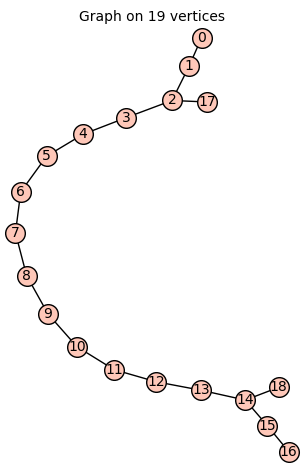

In [11]:
G_18_0_0

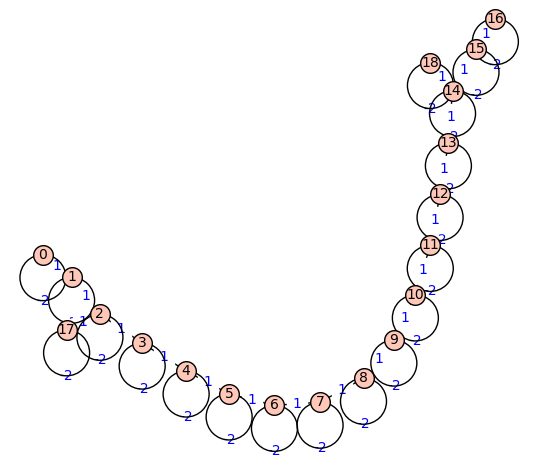

In [12]:
Quiver_18_0_0 = matrix_to_quiver(intersection_matrix_roots_18_0_0)
Quiver_18_0_0.plot(edge_labels=True)

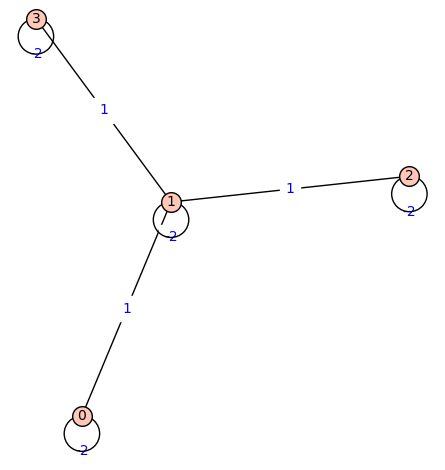

In [13]:
# test_G = Graph([ (1,1,-2), (1,2,1), (2,2,-2) ], loops=True)
test_G = graph_D_n(4)
test_G.plot(edge_labels=True) 

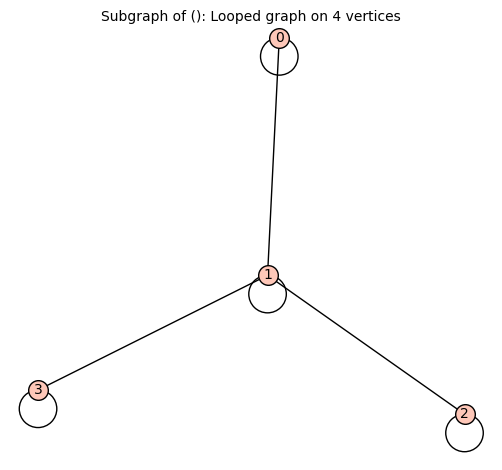

In [15]:
def quiver_to_matrix(G):
    verts = G.vertices()
    n = len(verts)
    M = zero_matrix(ZZ, n)
    for e in G.edges():
        M[ verts.index( e[0] ), verts.index( e[1] ) ] = e[2]
        M[ verts.index( e[1] ), verts.index( e[0] ) ] = e[2]
    return M
    
def is_elliptic_subgraph(H):
    return is_elliptic_matrix( quiver_to_matrix(H) )
    
def get_all_elliptic_subgraphs(G):
    
    all_possible_subgraphs = [
        G.subgraph(l) 
        for l in subsets( set(list( G.vertices()) ) ) 
        if l != [] 
    ]

    
    return list(reversed(sorted(
        [H for H in all_possible_subgraphs if is_elliptic_subgraph(H) ],
        key=len
    )))


get_all_elliptic_subgraphs(test_G)[0]

In [44]:
def get_coxeter_label_from_matrix(M):
    assert M.nrows() == M.ncols()
    n = M.nrows()
    ade_types = get_all_rank_n_types(n)
    this_type = [ x[0] for x in ade_types if x[1].is_similar(M) ]
    assert len(this_type) >= 1
    return this_type[0]
    
def get_coxeter_label_graph(G):
    n = len( G.vertices() )
    M_G = quiver_to_matrix(G)
    return get_coxeter_label_from_matrix(M)

def get_all_orbits_elliptic_subgraphs(G):
    AutG = G.automorphism_group()
    all_elliptic_subgraphs = get_all_elliptic_subgraphs(G)
    orbits = set()

    for H in all_elliptic_subgraphs:
        orb = AutG.orbit( tuple(H.vertices() ), action = "OnSets")
        lp = sorted( [ tuple( sorted(l) ) for l in orb] )
        orbits.add(tuple( lp ))

    return [ G.subgraph(H[0]) for H in orbits ] 

get
    
def get_labeled_orbits(G):
    orbits = get_all_orbits_elliptic_subgraphs(G)
    # representative_subgraphs = [ quiver_to_matrix(x.subgraph(xp)) for xp in x.connected_components() ]
    labels = []
    for x in orbits:
        ls = [ quiver_to_matrix(x.subgraph(xp)) for xp in x.connected_components() ]
        lsp = [ (get_coxeter_label_from_matrix(M), M ) for M in ls ]
        # show( len(x.connected_components() ), ": ", lsp )
        label = reduce(lambda a,b: a + " ⊕ " + b, list(map(lambda a: a[0], lsp) ))
        labels.append( (label, x) )
    return labels
    


In [ ]:
all_elliptics_orbits = get_labeled_orbits(Quiver_18_0_0)

In [ ]:
len( all_elliptics_orbits 